In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [3]:
BancoDados = pd.read_csv("CSV.csv")



---

#Analises de dados



---

##Visualizando informacoes primárias

In [4]:
BancoDados['transaction_date'] = pd.to_datetime(BancoDados['transaction_date'])
BancoDados['transaction_date'] = BancoDados['transaction_date'].dt.strftime("%H:%M %d/%m/%Y")

In [5]:
BancoDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      3199 non-null   int64  
 1   merchant_id         3199 non-null   int64  
 2   user_id             3199 non-null   int64  
 3   card_number         3199 non-null   object 
 4   transaction_date    3199 non-null   object 
 5   transaction_amount  3199 non-null   float64
 6   device_id           2369 non-null   float64
 7   has_cbk             3199 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 178.2+ KB


In [6]:
BancoDados['transaction_amount'].describe()

count    3199.000000
mean      767.812904
std       889.095904
min         1.220000
25%       205.235000
50%       415.940000
75%       981.680000
max      4097.210000
Name: transaction_amount, dtype: float64

In [157]:
# Criando BancoDadosDataHora para o sistema anti-fraude, será usado só na secao de sistema anti-fraude
BancoDados['transaction_date_day'] = pd.to_datetime(BancoDados['transaction_date'], format='%H:%M %d/%m/%Y').dt.strftime('%d/%m/%Y')
BancoDados['transaction_date_hour'] = pd.to_datetime(BancoDados['transaction_date'], format='%H:%M %d/%m/%Y').dt.hour
BancoDados['transaction_date_minute'] = pd.to_datetime(BancoDados['transaction_date'], format='%H:%M %d/%m/%Y').dt.minute

BancoDadosHoraData = BancoDados

BancoDados = BancoDados.drop(['transaction_date_day', 'transaction_date_hour', 'transaction_date_minute'], axis=1)



---
##Visualizando as primeiras anomalias


In [7]:
transacoesPorCliente = BancoDados['user_id'].value_counts()
print(transacoesPorCliente)

11750    31
91637    22
79054    17
96025    14
78262    13
         ..
47677     1
17323     1
38289     1
33764     1
8         1
Name: user_id, Length: 2704, dtype: int64


In [8]:
clienteMaisDeUmaCompra = BancoDados['user_id'].value_counts()
clienteMaisDeUmaCompra = clienteMaisDeUmaCompra [clienteMaisDeUmaCompra  > 1]
print(clienteMaisDeUmaCompra)

11750    31
91637    22
79054    17
96025    14
78262    13
         ..
61637     2
39443     2
89626     2
34172     2
26913     2
Name: user_id, Length: 235, dtype: int64


In [9]:
transacoesPorLojista = BancoDados['merchant_id'].value_counts()
print(transacoesPorLojista)

49205    73
17275    30
4705     22
79698    22
53041    19
         ..
65041     1
54860     1
38891     1
55156     1
9603      1
Name: merchant_id, Length: 1756, dtype: int64


In [10]:
lojistaMaisDeUmaCompra = BancoDados['merchant_id'].value_counts()
lojistaMaisDeUmaCompra = lojistaMaisDeUmaCompra [lojistaMaisDeUmaCompra  > 1]
print(lojistaMaisDeUmaCompra)

49205    73
17275    30
4705     22
79698    22
53041    19
         ..
29140     2
57534     2
10707     2
55531     2
13202     2
Name: merchant_id, Length: 514, dtype: int64


In [11]:
transacoesPorCartao = BancoDados['card_number'].value_counts()
print(transacoesPorCartao)

554482******7640    10
432957******7262     7
530034******3859     6
520132******7705     6
651653******2256     5
                    ..
506778******7321     1
650486******2500     1
458919******4999     1
521433******5690     1
650487******9884     1
Name: card_number, Length: 2925, dtype: int64


In [12]:
cartaoMaisDeUmaCompra = BancoDados['card_number'].value_counts()
cartaoMaisDeUmaCompra = cartaoMaisDeUmaCompra [cartaoMaisDeUmaCompra  > 1]
print(cartaoMaisDeUmaCompra)

554482******7640    10
432957******7262     7
530034******3859     6
520132******7705     6
651653******2256     5
                    ..
518454******7187     2
490172******9947     2
530034******7995     2
528392******3157     2
525631******6430     2
Name: card_number, Length: 192, dtype: int64


In [13]:
transacoesPorDispositivo = BancoDados['device_id'].value_counts()
print(transacoesPorDispositivo)

563499.0    22
342890.0    19
101848.0    17
438940.0    14
547440.0    13
            ..
181596.0     1
961638.0     1
99435.0      1
312720.0     1
4.0          1
Name: device_id, Length: 1996, dtype: int64


In [14]:
dispositivoMaisDeUmaCompra = BancoDados['device_id'].value_counts()
dispositivoMaisDeUmaCompra = dispositivoMaisDeUmaCompra [dispositivoMaisDeUmaCompra  > 1]
print(dispositivoMaisDeUmaCompra)

563499.0    22
342890.0    19
101848.0    17
438940.0    14
547440.0    13
            ..
471506.0     2
321795.0     2
34672.0      2
290539.0     2
402547.0     2
Name: device_id, Length: 177, dtype: int64


In [15]:
pedidoComCbk = BancoDados['has_cbk'].value_counts()[True]
print(pedidoComCbk)

391


In [16]:
pedidoSemCbk = BancoDados['has_cbk'].value_counts()[False]
print(pedidoSemCbk)

2808


### Há 391 pedidos com Chargebacks, o que significa 12,22% das transacoes

### 235 clientes fizeram mais de uma compra. (8,7% dos clientes)

### 514 lojistas realizaram mais de uma venda (29,3% dos lojistas)

### 192 cartoes foram usados em mais de uma compra (6,5% dos cartoes)

### 176 dispositivos foram usados mais de uma vez (8,8% dos dispositivos)




---

##Separando e criando dois dataframes separando as fraudes

In [17]:
transacoesComFraude = BancoDados[BancoDados['has_cbk'] == True]
transacoesComFraude

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
1,21320399,92895,2708,444456******4210,22:45 01/12/2019,734.87,497105.0,True
3,21320401,68657,69758,464296******3991,21:59 01/12/2019,2556.13,NaN,True
7,21320405,56107,81152,650516******9201,21:24 01/12/2019,188.68,486.0,True
8,21320406,56107,81152,650516******9201,21:13 01/12/2019,352.77,486.0,True
9,21320407,56107,81152,650516******9201,21:04 01/12/2019,345.68,486.0,True
...,...,...,...,...,...,...,...,...
3157,21323555,41354,19820,606282******6581,18:04 02/11/2019,4028.55,NaN,True
3165,21323563,41354,19820,606282******6581,16:33 02/11/2019,4031.00,NaN,True
3178,21323576,16266,96495,522840******2045,22:10 01/11/2019,762.18,NaN,True
3180,21323578,16266,96495,552305******4782,20:54 01/11/2019,2936.66,NaN,True


In [18]:
transacoesSemFraude = BancoDados[BancoDados['has_cbk'] == False]
transacoesSemFraude

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,23:16 01/12/2019,374.56,285475.0,False
2,21320400,47759,14777,425850******7024,22:22 01/12/2019,760.36,NaN,False
4,21320402,54075,64367,650487******6116,21:30 01/12/2019,55.36,860232.0,False
5,21320403,59566,40759,516292******8220,21:25 01/12/2019,60.49,192705.0,False
6,21320404,20917,25661,650485******9310,21:25 01/12/2019,318.37,760932.0,False
...,...,...,...,...,...,...,...,...
3194,21323592,50493,49581,650486******4139,13:05 01/11/2019,744.15,NaN,False
3195,21323593,9603,59275,528052******3611,11:47 01/11/2019,1403.67,NaN,False
3196,21323594,57997,84486,522688******9874,10:23 01/11/2019,1.55,NaN,False
3197,21323595,35930,7,544315******7773,01:29 01/11/2019,359.68,NaN,False


In [19]:
transacoesComFraude['transaction_amount'].describe()

count     391.000000
mean     1453.571918
std      1169.491346
min         2.890000
25%       565.580000
50%       999.470000
75%      2140.680000
max      4097.210000
Name: transaction_amount, dtype: float64

In [20]:
transacoesSemFraude['transaction_amount'].describe()

count    2808.000000
mean      672.324380
std       797.463853
min         1.220000
25%       191.285000
50%       360.315000
75%       812.577500
max      4091.830000
Name: transaction_amount, dtype: float64



---

## Separando os players com has_cbk



---

### Players com has_cbk = true

In [21]:
lojistaComFraude = transacoesComFraude['merchant_id'].unique()

In [22]:
clienteComFraude = transacoesComFraude['user_id'].unique()

In [23]:
cartoesComFraude = transacoesComFraude['card_number'].unique()

In [24]:
dispositivoComFraude = transacoesComFraude['device_id'].unique()

In [25]:
lojistaComFraude

array([92895, 68657, 56107, 53816, 11470, 73271, 56977, 49710, 68953,
       67764, 66876, 84970, 17275, 72723, 62194, 81795,  5533,  5404,
       23722, 11570, 83142, 92215, 48912, 99644, 15326, 29214, 63050,
       38568, 44927, 99510, 91972,  4694, 29744, 73205, 15950,  3531,
       49909, 23531, 38901, 48126, 97291,  4153,  1308, 83982, 38755,
       18768,  4705, 36617,  5252, 60526, 18267, 21281, 46609, 13096,
       91446, 98272, 46045, 42356, 55854, 73922,  3109, 89943, 67075,
       12745, 91352, 94198, 90035, 20663, 59875, 65330, 65241,  5763,
       82867, 75917, 62613,  1175, 18344, 54603, 74211, 39253,  2842,
       76239, 35917, 36700,  8787, 38337, 52897, 62988, 11911, 53041,
       48982, 71378, 25473, 60779, 84902, 96692,  1017, 25199, 71507,
        9292, 81894, 54572, 74450, 94053,  7535, 45399, 49919, 11973,
       23017, 77130, 25932, 70899, 77570, 76725, 62052,  8942, 41354,
       16266])



---

### Players com has_cbk = false

In [26]:
lojistaSemFraude = transacoesSemFraude['merchant_id'].unique()

In [27]:
clienteSemFraude = transacoesSemFraude['user_id'].unique()

In [28]:
cartoesSemFraude = transacoesSemFraude['card_number'].unique()

In [29]:
dispositivoSemFraude = transacoesSemFraude['device_id'].unique()



---

## Análise das transacoes sem device_ID

In [30]:
transacoesSemDeviceId = BancoDados[BancoDados['device_id'].isnull()]
transacoesComDeviceId = BancoDados[~BancoDados['device_id'].isnull()]

In [31]:
transacoesSemDeviceIdCbkOn = transacoesSemDeviceId[transacoesSemDeviceId['has_cbk'] == True]

In [32]:
lojistasSemDeviceIdCbkOn = transacoesSemDeviceIdCbkOn['merchant_id'].unique()
clientesSemDeviceIdCbkOn = transacoesSemDeviceIdCbkOn['user_id'].unique()
cartoesSemDeviceIdCbkOn = transacoesSemDeviceIdCbkOn['card_number'].unique()
dispositivosSemDeviceIdCbkOn = transacoesSemDeviceIdCbkOn['device_id'].unique()

In [33]:
transacoesSemDeviceIdCbkOff = transacoesSemDeviceId[transacoesSemDeviceId['has_cbk'] == False]

In [34]:
listaLojistasSemDeviceComFraude = transacoesSemDeviceIdCbkOn['merchant_id'].unique()
listaLojistasSemDeviceComFraude

array([68657, 56977, 72723, 11570, 92215,  4694, 44927, 97291, 83982,
       99510, 36700, 11911, 65330, 74450, 11973, 91972, 23017, 49919,
       77130, 25932, 70899, 77570, 76725, 62052,  8942, 41354, 16266])

In [35]:
lojistasSemDeviceIdCbkOff = transacoesSemDeviceIdCbkOff['merchant_id'].unique()
clientesSemDeviceIdCbkOff = transacoesSemDeviceIdCbkOff['user_id'].unique()
cartoesSemDeviceIdCbkOff = transacoesSemDeviceIdCbkOff['card_number'].unique()
dispositivosSemDeviceIdCbkOff = transacoesSemDeviceIdCbkOff['device_id'].unique()



---

## Analisando transaction_amount

In [36]:
BancoDados['transaction_amount'].describe()

count    3199.000000
mean      767.812904
std       889.095904
min         1.220000
25%       205.235000
50%       415.940000
75%       981.680000
max      4097.210000
Name: transaction_amount, dtype: float64

In [37]:
transacoesComFraude['transaction_amount'].describe()

count     391.000000
mean     1453.571918
std      1169.491346
min         2.890000
25%       565.580000
50%       999.470000
75%      2140.680000
max      4097.210000
Name: transaction_amount, dtype: float64

In [38]:
transacoesSemFraude['transaction_amount'].describe()

count    2808.000000
mean      672.324380
std       797.463853
min         1.220000
25%       191.285000
50%       360.315000
75%       812.577500
max      4091.830000
Name: transaction_amount, dtype: float64

In [39]:
transacoesComFraudeAgrupadas = transacoesComFraude['transaction_amount'].groupby(pd.cut(transacoesComFraude['transaction_amount'], bins=range(0, 4100, 100))).count()
transacoesSemFraudeAgrupadas = transacoesSemFraude['transaction_amount'].groupby(pd.cut(transacoesSemFraude['transaction_amount'], bins=range(0, 4100, 100))).count()

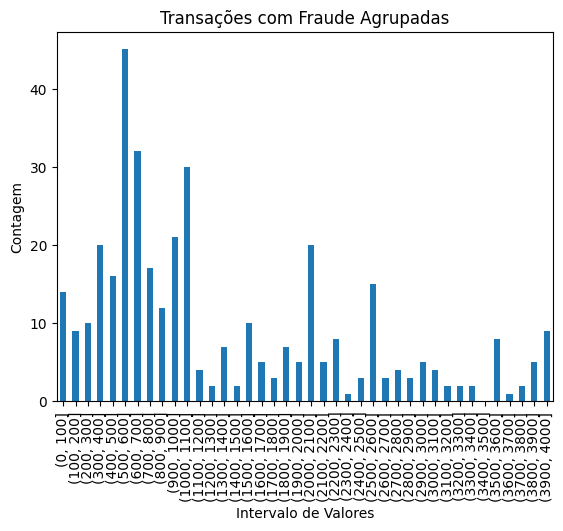

In [40]:
transacoesComFraudeAgrupadas.plot(kind='bar')

plt.title('Transações com Fraude Agrupadas')
plt.xlabel('Intervalo de Valores')
plt.ylabel('Contagem')

plt.show()

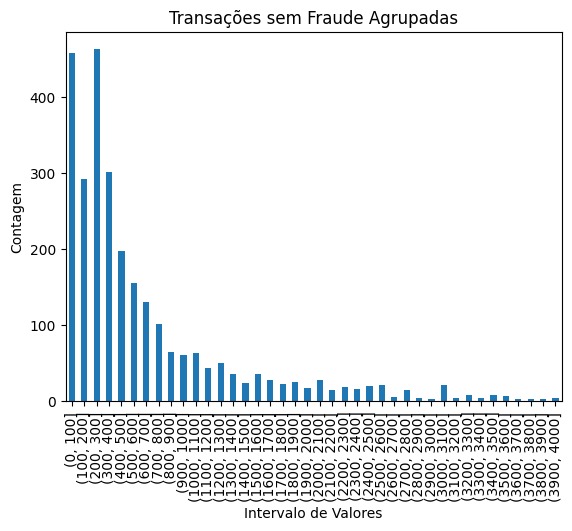

In [41]:
transacoesSemFraudeAgrupadas.plot(kind='bar')

plt.title('Transações sem Fraude Agrupadas')
plt.xlabel('Intervalo de Valores')
plt.ylabel('Contagem')

plt.show()



---

## Fazendo analises aprofundadas

### Vendo valores por coluna

In [42]:
frequenciaLojistasComFraude = transacoesComFraude['merchant_id'].value_counts()
frequenciaLojistasComFraude

17275    22
4705     19
1308     15
53041    14
77130    13
         ..
90035     1
5763      1
62613     1
1175      1
73922     1
Name: merchant_id, Length: 118, dtype: int64

In [43]:
frequenciaLojistasSemFraude = transacoesSemFraude['merchant_id'].value_counts()
frequenciaLojistasSemFraude

49205    73
79698    22
26765    18
17348    16
26981    16
         ..
38891     1
12745     1
55156     1
30032     1
9603      1
Name: merchant_id, Length: 1690, dtype: int64

In [44]:
frequenciaClienteComFraude = transacoesComFraude['user_id'].value_counts()
frequenciaClienteComFraude

11750    25
91637    19
79054    15
96025    13
78262    12
         ..
74844     1
23916     1
41281     1
23429     1
2708      1
Name: user_id, Length: 153, dtype: int64

In [45]:
frequenciaClienteSemFraude = transacoesSemFraude['user_id'].value_counts()
frequenciaClienteSemFraude

77959    7
49106    7
11750    6
34548    6
40779    6
        ..
22494    1
47677    1
17323    1
38289    1
8        1
Name: user_id, Length: 2584, dtype: int64

In [46]:
frequenciaCartoesComFraude= transacoesComFraude['card_number'].value_counts()
frequenciaCartoesComFraude

554482******7640    10
530034******3859     6
651653******2256     5
530034******8258     4
441030******2146     4
                    ..
406655******9249     1
406655******8913     1
406655******2259     1
406655******8833     1
527496******2850     1
Name: card_number, Length: 274, dtype: int64

In [47]:
frequenciaCartoesSemFraude= transacoesSemFraude['card_number'].value_counts()
frequenciaCartoesSemFraude

432957******7262    7
520132******7705    6
536805******7429    4
410863******7755    4
651660******3628    4
                   ..
530780******7007    1
550209******7808    1
476331******3122    1
472280******3538    1
650487******9884    1
Name: card_number, Length: 2658, dtype: int64

In [48]:
frequenciaDispositivoComFraude = transacoesComFraude['device_id'].value_counts()
frequenciaDispositivoComFraude

563499.0    19
342890.0    15
101848.0    15
438940.0    13
547440.0    12
            ..
857439.0     1
660508.0     1
561984.0     1
123636.0     1
207247.0     1
Name: device_id, Length: 129, dtype: int64

In [49]:
frequenciaDispositivoSemFraude = transacoesSemFraude['device_id'].value_counts()
frequenciaDispositivoSemFraude

589318.0    7
274282.0    5
115003.0    5
203134.0    5
715437.0    4
           ..
99435.0     1
312720.0    1
867567.0    1
894628.0    1
977260.0    1
Name: device_id, Length: 1894, dtype: int64



---

### Identificando os cartoes com mais de 1 usuário

In [50]:
userPorCartao = BancoDados.groupby('card_number')['user_id'].nunique()
cartoesMaisdeUmUser = userPorCartao[userPorCartao > 1]
detalhesCartoesMaisdeUmUser = BancoDados[BancoDados['card_number'].isin(cartoesMaisdeUmUser.index)]
detalhesCartoesMaisdeUmUser = detalhesCartoesMaisdeUmUser.sort_values('card_number', ascending=True)
detalhesCartoesMaisdeUmUser

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
1836,21322234,73152,5156,230650******7507,18:15 22/11/2019,306.95,774426.0,False
1438,21321836,49205,13080,230650******7507,19:37 23/11/2019,253.00,316601.0,False
755,21321153,36617,79054,406655******4572,00:04 29/11/2019,2971.56,101848.0,True
724,21321122,1308,96025,406655******4572,03:17 29/11/2019,1648.30,438940.0,True
734,21321132,1308,96025,406655******5763,02:02 29/11/2019,2904.60,438940.0,True
...,...,...,...,...,...,...,...,...
545,21320943,63050,4651,606282******4880,18:34 29/11/2019,3068.63,571150.0,True
305,21320703,43575,3995,650516******3633,16:10 30/11/2019,255.15,794200.0,False
2545,21322943,43575,11924,650516******3633,15:00 17/11/2019,156.12,704203.0,False
2660,21323058,33192,34548,651668******2020,15:42 15/11/2019,30.37,203134.0,False


In [51]:
detalhesCartoesMaisdeUmUserCbkOn = detalhesCartoesMaisdeUmUser[detalhesCartoesMaisdeUmUser['has_cbk'] == True].copy()
detalhesCartoesMaisdeUmUserCbkOn = detalhesCartoesMaisdeUmUserCbkOn.sort_values('card_number', ascending=True)
detalhesCartoesMaisdeUmUserCbkOn

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
755,21321153,36617,79054,406655******4572,00:04 29/11/2019,2971.56,101848.0,True
724,21321122,1308,96025,406655******4572,03:17 29/11/2019,1648.30,438940.0,True
734,21321132,1308,96025,406655******5763,02:02 29/11/2019,2904.60,438940.0,True
727,21321125,1308,79054,406655******5763,02:58 29/11/2019,1834.09,101848.0,True
596,21320994,1308,96025,406655******7343,16:46 29/11/2019,2288.47,438940.0,True
569,21320967,1308,96025,406655******7343,17:42 29/11/2019,2259.99,438940.0,True
692,21321090,1308,79054,406655******7343,12:51 29/11/2019,2231.98,101848.0,True
1800,21322198,53041,900,412177******1138,19:15 22/11/2019,1346.26,691601.0,True
1212,21321610,90035,85612,412177******1138,14:11 26/11/2019,556.91,653105.0,True
32,21320430,56977,69758,464296******3991,19:17 01/12/2019,2803.32,NaN,True




---

### Indicando os players que só tiveram cbk

In [52]:
lojistasComFraudeApenas = np.setdiff1d(lojistaComFraude, lojistaSemFraude)
clientesComFraudeApenas = np.setdiff1d(clienteComFraude, clienteSemFraude)
cartoesComFraudeApenas = np.setdiff1d(cartoesComFraude, cartoesSemFraude)
dispositivosComFraudeApenas = np.setdiff1d(dispositivoComFraude, dispositivoSemFraude)
dispositivosComFraudeApenas = pd.Series(dispositivosComFraudeApenas).dropna().tolist()

In [53]:
lojistasSemFraudeApenas = np.setdiff1d(lojistaSemFraude, lojistaComFraude)
clientesSemFraudeApenas = np.setdiff1d(clienteSemFraude, clienteComFraude)
cartoesSemFraudeApenas = np.setdiff1d(cartoesSemFraude, cartoesComFraude)
dispositivosSemFraudeApenas = np.setdiff1d(dispositivoSemFraude, dispositivoComFraude)
dispositivosSemFraudeApenas = pd.Series(dispositivosSemFraudeApenas).dropna().tolist()
len(dispositivosSemFraudeApenas)

1867

### Identificando os clientes com mais de 1 cartao

In [54]:
contagemCartoes = BancoDados.groupby('user_id')['card_number'].nunique()
clientesMaisDeUmCartao = contagemCartoes[contagemCartoes > 1].index.tolist()
comprasClientesMaisDeUmCartao = BancoDados[BancoDados['user_id'].isin(clientesMaisDeUmCartao)]
comprasClientesMaisDeUmCartao = comprasClientesMaisDeUmCartao.sort_values('user_id')
quantidadeClientesMaisDeUmCartao = comprasClientesMaisDeUmCartao['user_id'].nunique()
comprasClientesMaisDeUmCartao

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
2520,21322918,42687,1516,423153******7295,18:19 17/11/2019,1354.65,167508.0,False
2324,21322722,42687,1516,423153******7583,15:41 19/11/2019,3375.01,167508.0,False
948,21321346,91,1668,406441******1400,16:22 28/11/2019,466.36,208768.0,False
2021,21322419,91,1668,536518******2118,01:55 22/11/2019,1052.86,208768.0,False
450,21320848,23591,1836,444456******3799,23:12 29/11/2019,708.34,889989.0,False
...,...,...,...,...,...,...,...,...
419,21320817,38568,99396,422100******2853,00:29 30/11/2019,471.94,834436.0,True
327,21320725,38568,99396,412177******2318,15:09 30/11/2019,2559.25,248385.0,True
306,21320704,38568,99396,536380******6214,16:09 30/11/2019,3627.51,834436.0,True
1709,21322107,8754,99850,655000******8835,22:48 22/11/2019,2593.15,880573.0,False


In [55]:
comprasClientesMaisDeUmCartaoCbkOn = comprasClientesMaisDeUmCartao.loc[comprasClientesMaisDeUmCartao['has_cbk'] == True]
listaClientesMaisDeUmCartaoCbkOn = comprasClientesMaisDeUmCartaoCbkOn['user_id'].unique()
comprasClientesMaisDeUmCartaoCbkOn

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
1,21320399,92895,2708,444456******4210,22:45 01/12/2019,734.87,497105.0,True
1050,21321448,55854,3584,544731******9913,23:20 27/11/2019,542.36,707086.0,True
1068,21321466,55854,3584,544731******7164,20:03 27/11/2019,607.96,707086.0,True
1069,21321467,55854,3584,544731******7164,19:56 27/11/2019,971.97,707086.0,True
1074,21321472,55854,3584,544731******7164,19:27 27/11/2019,529.19,707086.0,True
...,...,...,...,...,...,...,...,...
472,21320870,38568,99396,606282******6990,21:43 29/11/2019,820.01,278124.0,True
446,21320844,38568,99396,524703******3515,23:25 29/11/2019,2580.62,278124.0,True
419,21320817,38568,99396,422100******2853,00:29 30/11/2019,471.94,834436.0,True
327,21320725,38568,99396,412177******2318,15:09 30/11/2019,2559.25,248385.0,True




---

## Primeiras análises



---

### Visualizando os lojistas que fizeram mais de 1 venda e todas as compras tiveram chargeback

In [56]:
#Visualizando só os lojistas que tiveram todas suas compras com Chargeback

listaLojistasComFraude = BancoDados[BancoDados['merchant_id'].isin(lojistasComFraudeApenas)]

In [57]:
#Filtrando as lojas que tiveram mais de 1 compra
contagemOcorrencias = listaLojistasComFraude['merchant_id'].value_counts()
valoresRepetidos = contagemOcorrencias[contagemOcorrencias > 1].index.tolist()

#Visualizando as lojas que tiveram mais de 1 compra e todas as transacoes tiveram cashback
listaLojistasComFraudeMaisde1Compra = listaLojistasComFraude[listaLojistasComFraude['merchant_id'].isin(valoresRepetidos)]
listaLojistasComFraudeMaisde1Compra

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
30,21320428,73271,7725,489391******7420,19:22 01/12/2019,2092.79,308950.0,True
55,21320453,67764,21768,530034******3859,16:55 01/12/2019,1012.16,357277.0,True
56,21320454,67764,21768,530034******3859,16:52 01/12/2019,170.69,357277.0,True
134,21320532,72723,26251,530034******4649,03:35 01/12/2019,695.36,NaN,True
135,21320533,72723,26251,530034******4649,03:20 01/12/2019,991.37,NaN,True
...,...,...,...,...,...,...,...,...
3142,21323540,8942,76819,552289******8870,16:08 03/11/2019,1551.77,NaN,True
3156,21323554,41354,19820,606282******6581,18:07 02/11/2019,234.06,NaN,True
3157,21323555,41354,19820,606282******6581,18:04 02/11/2019,4028.55,NaN,True
3165,21323563,41354,19820,606282******6581,16:33 02/11/2019,4031.00,NaN,True


In [58]:
#Lista dos lojistas que tiveram mais de 1 compra e todas as transacoes tiveram chargeback
listaNomeLojistasComTodasFraudesMaisde1Compra = listaLojistasComFraudeMaisde1Compra['merchant_id'].unique()
listaNomeLojistasComTodasFraudesMaisde1Compra

array([73271, 67764, 72723, 81795,  5533, 83142, 15326, 38568, 44927,
       73205, 15950,  3531, 48126,  1308, 46609, 89943, 59875, 65241,
       75917, 54603, 74211, 35917, 38337, 52897, 62988, 11911, 25932,
       77570,  8942, 41354])



---

### Visualizando os cartoes que foram utilizados por mais de um cliente e que todas as compras tiveram chargeback

In [59]:
#Extraindo da lista de cartoes usados mais de uma vez, os cartoes que todas as compras tiveram chargeback
detalhesCartoesMaisdeUmUserCbkOn = detalhesCartoesMaisdeUmUser[detalhesCartoesMaisdeUmUser['has_cbk'] == True].copy()
detalhesCartoesMaisdeUmUserCbkOn = detalhesCartoesMaisdeUmUserCbkOn.sort_values('card_number', ascending=True)

In [60]:
#Lista dos cartoes que tiveram mais de 1 cliente utilizando e que todas as compras tiveram chargeback
listaCartoesMaisdeUmUserCbkOn = detalhesCartoesMaisdeUmUserCbkOn['card_number'].unique().tolist()
listaCartoesMaisdeUmUserCbkOn

['406655******4572',
 '406655******5763',
 '406655******7343',
 '412177******1138',
 '464296******3991',
 '490172******3386',
 '496045******1160',
 '498408******4290',
 '536380******6214',
 '544731******8590',
 '606282******4880']



---

### Visualizando os dispositivos que fizeram mais de 1 compra e tiveram chargeback em todas as compras

In [61]:
#Visualizando os dispositivos que todas as compras teve chargeback
comprasDispositivosSomenteComFraudes = BancoDados.loc[BancoDados['device_id'].isin(dispositivosComFraudeApenas)]
comprasDispositivosSomenteComFraudes = comprasDispositivosSomenteComFraudes.sort_values(by='device_id')
comprasDispositivosSomenteComFraudes

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
7,21320405,56107,81152,650516******9201,21:24 01/12/2019,188.68,486.0,True
8,21320406,56107,81152,650516******9201,21:13 01/12/2019,352.77,486.0,True
9,21320407,56107,81152,650516******9201,21:04 01/12/2019,345.68,486.0,True
13,21320411,56107,81152,650516******7004,20:36 01/12/2019,32.86,486.0,True
2017,21322415,96692,43108,541555******6900,02:34 22/11/2019,980.74,6638.0,True
...,...,...,...,...,...,...,...,...
1424,21321822,75917,17929,606282******4736,20:03 23/11/2019,3557.90,960729.0,True
1441,21321839,75917,17929,606282******3253,19:32 23/11/2019,2201.48,960729.0,True
790,21321188,60526,17929,606282******9429,22:20 28/11/2019,4055.23,960729.0,True
447,21320845,23531,93679,515590******820,23:21 29/11/2019,585.05,972377.0,True


In [62]:
#Visualizando a lista de compras com dispositivos com mais de 1 compra que só tiveram chargbacks
agrupandodispositivosComFraudeApenas = comprasDispositivosSomenteComFraudes['device_id'].value_counts()
dispositivosComFraudeApenasMaisDeUmaCompra = agrupandodispositivosComFraudeApenas[agrupandodispositivosComFraudeApenas > 1].index.tolist()

#Lista de dispositivos que realizaram mais de 1 compra e que todas as compras tiveram chargebacks
dispositivosComFraudeApenasMaisDeUmaCompra = comprasDispositivosSomenteComFraudes[comprasDispositivosSomenteComFraudes['device_id'].isin(dispositivosComFraudeApenasMaisDeUmaCompra)]
listaDispositivosComFraudeApenasMaisDeUmaCompra = dispositivosComFraudeApenasMaisDeUmaCompra['device_id'].unique().tolist()
listaDispositivosComFraudeApenasMaisDeUmaCompra

[486.0,
 10312.0,
 17372.0,
 20098.0,
 46597.0,
 69227.0,
 81082.0,
 111836.0,
 122092.0,
 174844.0,
 180611.0,
 183034.0,
 190238.0,
 278124.0,
 288714.0,
 304880.0,
 306719.0,
 307489.0,
 308950.0,
 313443.0,
 314172.0,
 355583.0,
 357277.0,
 374474.0,
 386429.0,
 453490.0,
 457665.0,
 495100.0,
 570971.0,
 571150.0,
 597308.0,
 602462.0,
 611676.0,
 656429.0,
 670695.0,
 698520.0,
 705388.0,
 724452.0,
 738394.0,
 760682.0,
 770656.0,
 790235.0,
 822562.0,
 834436.0,
 835213.0,
 868746.0,
 881571.0,
 884678.0,
 960729.0]



---

### Visualizando os clientes que fizeram mais de uma compra e todas tiveram chargeback

In [63]:
listaComprasClientesComFraudeApenas = BancoDados.loc[BancoDados['user_id'].isin(clientesComFraudeApenas)]
listaComprasClientesComFraudeApenas = listaComprasClientesComFraudeApenas.sort_values(by='user_id')
listaComprasClientesComFraudeApenas

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
1800,21322198,53041,900,412177******1138,19:15 22/11/2019,1346.26,691601.0,True
142,21320540,62194,3157,535081******2584,01:50 01/12/2019,183.73,586347.0,True
1714,21322112,38337,4651,230744******4802,22:41 22/11/2019,1019.39,571150.0,True
1718,21322116,38337,4651,230744******4802,22:31 22/11/2019,2090.41,571150.0,True
545,21320943,63050,4651,606282******4880,18:34 29/11/2019,3068.63,571150.0,True
...,...,...,...,...,...,...,...,...
327,21320725,38568,99396,412177******2318,15:09 30/11/2019,2559.25,248385.0,True
419,21320817,38568,99396,422100******2853,00:29 30/11/2019,471.94,834436.0,True
446,21320844,38568,99396,524703******3515,23:25 29/11/2019,2580.62,278124.0,True
472,21320870,38568,99396,606282******6990,21:43 29/11/2019,820.01,278124.0,True


In [64]:
listaComprasClientesMaisdeUmaCompracomFraudeApenas = listaComprasClientesComFraudeApenas[listaComprasClientesComFraudeApenas.duplicated(subset='user_id', keep=False)]

listaClientesMaisDeUmaCompraComFraudeApenas = listaComprasClientesMaisdeUmaCompracomFraudeApenas['user_id'].unique()
listaClientesMaisDeUmaCompraComFraudeApenas

array([ 4651,  5541,  6761,  7725,  9600, 11065, 12678, 16862, 17807,
       17929, 19820, 21233, 21702, 21768, 24543, 26251, 27555, 27779,
       28218, 30874, 35138, 37113, 40493, 44531, 47604, 50643, 52129,
       53850, 55630, 56139, 58905, 66979, 69466, 69758, 70557, 71424,
       73385, 75710, 75889, 76422, 76768, 76819, 79998, 81152, 81164,
       83258, 86411, 87048, 90176, 92259, 92930, 93156, 93767, 96495,
       97611, 99396])



---

### Visualizando players que possuem compras com e sem chargeback

In [65]:
# Lojistas
lojistasAgrupadosTrueeFalse = BancoDados.groupby('merchant_id')['has_cbk'].agg(['any', 'all'])
lojistasComChargebackTrueFalse = lojistasAgrupadosTrueeFalse[(lojistasAgrupadosTrueeFalse['any'] == True) & (lojistasAgrupadosTrueeFalse['all'] == False)]
lojistasComChargebackTrueFalse.index.tolist()

[4153,
 4705,
 5404,
 11973,
 12745,
 16266,
 17275,
 18267,
 18344,
 20663,
 23017,
 23722,
 25473,
 29214,
 29744,
 36617,
 36700,
 38755,
 38901,
 39253,
 42356,
 46045,
 48912,
 48982,
 49909,
 49919,
 53041,
 54572,
 55854,
 56107,
 60526,
 60779,
 62052,
 63050,
 65330,
 66876,
 68953,
 71378,
 71507,
 76725,
 77130,
 81894,
 82867,
 84970,
 90035,
 91446,
 91972,
 92895,
 94198,
 97291,
 98272,
 99510]

In [66]:
# Clientes
clientesAgrupadosTrueeFalse = BancoDados.groupby('user_id')['has_cbk'].agg(['any', 'all'])
clientesComChargebackTrueFalse = clientesAgrupadosTrueeFalse[(clientesAgrupadosTrueeFalse['any'] == True) & (clientesAgrupadosTrueeFalse['all'] == False)]
clientesComChargebackTrueFalse.index.tolist()

[2708,
 3584,
 7281,
 7695,
 9853,
 10241,
 10378,
 11452,
 11750,
 16781,
 18227,
 23429,
 24644,
 27657,
 31819,
 33805,
 39443,
 42677,
 56877,
 57594,
 64057,
 65935,
 67519,
 69588,
 71433,
 78262,
 79054,
 83722,
 89615,
 90182,
 91637,
 92034,
 96025]

In [67]:
# Cartoes
cartoesAgrupadosTrueeFalse = BancoDados.groupby('card_number')['has_cbk'].agg(['any', 'all'])
cartoesComChargebackTrueFalse = cartoesAgrupadosTrueeFalse[(cartoesAgrupadosTrueeFalse['any'] == True) & (cartoesAgrupadosTrueeFalse['all'] == False)]
cartoesComChargebackTrueFalse.index.tolist()

['455183******5202',
 '496045******1160',
 '536380******6214',
 '544731******8590',
 '546056******2924',
 '550209******3098',
 '606282******5785']

In [68]:
# Dispositivos
dispositivosAgrupadosTrueeFalse = BancoDados.groupby('device_id')['has_cbk'].agg(['any', 'all'])
dispositivosComChargebackTrueFalse = dispositivosAgrupadosTrueeFalse[(dispositivosAgrupadosTrueeFalse['any'] == True) & (dispositivosAgrupadosTrueeFalse['all'] == False)]
dispositivosComChargebackTrueFalse.index.tolist()

[60010.0,
 61321.0,
 94234.0,
 101848.0,
 112327.0,
 223682.0,
 262327.0,
 274282.0,
 330437.0,
 333645.0,
 342890.0,
 438940.0,
 497105.0,
 542535.0,
 547440.0,
 563499.0,
 645413.0,
 686249.0,
 707086.0,
 707435.0,
 708348.0,
 766158.0,
 777035.0,
 782901.0,
 866529.0,
 977260.0,
 978084.0]



---

### Testes

In [69]:
listaCompraslojistasComChargebackTrueFalse = BancoDados[BancoDados['merchant_id'].isin(lojistasComChargebackTrueFalse.index.tolist())].copy()
listaClienteslojistasComChargebackTrueFalse = BancoDados[BancoDados['user_id'].isin(clientesComChargebackTrueFalse.index.tolist())].copy()
listaCartoeslojistasComChargebackTrueFalse = BancoDados[BancoDados['card_number'].isin(cartoesComChargebackTrueFalse.index.tolist())].copy()
listaDispositivosslojistasComChargebackTrueFalse = BancoDados[BancoDados['device_id'].isin(dispositivosComChargebackTrueFalse.index.tolist())].copy()



---

### Identificando os clientes que fizeram compras em mais de uma loja e todos os pedidos tiveram chargeback

In [70]:
contadorClientesFraudes = transacoesComFraude.groupby('user_id')['merchant_id'].nunique()
clientesMaisdeUmLojistaFraudes = contadorClientesFraudes[contadorClientesFraudes > 1].index
clientesMaisdeUmLojistaFraudes

Int64Index([ 4651,  5541,  9853, 11452, 11750, 17929, 21768, 27657, 44531,
            69466, 69588, 69758, 76768, 78262, 79054, 83258, 92034, 93767,
            96025],
           dtype='int64', name='user_id')



---

### Identificando os lojistas que fizeram compras sem device_id e só teve registro de fraude

In [71]:
listaLojistasSemDeviceComFraude = transacoesSemDeviceIdCbkOn['merchant_id'].unique()
listaLojistasSemDeviceComFraude

array([68657, 56977, 72723, 11570, 92215,  4694, 44927, 97291, 83982,
       99510, 36700, 11911, 65330, 74450, 11973, 91972, 23017, 49919,
       77130, 25932, 70899, 77570, 76725, 62052,  8942, 41354, 16266])

In [72]:
listaClientesTransacoesSemFraude = set(transacoesSemFraude['merchant_id'])

In [73]:
listaLojistasSemDeviceComFraude = [valor for valor in listaLojistasSemDeviceComFraude if valor not in listaClientesTransacoesSemFraude]

In [74]:
listaLojistasSemDeviceComFraude

[68657,
 56977,
 72723,
 11570,
 92215,
 4694,
 44927,
 83982,
 11911,
 74450,
 25932,
 70899,
 77570,
 8942,
 41354]



---

### Identificando lojistas que fizeram compras com e sem device_id

In [75]:
lojistaSemDevice = set(transacoesSemDeviceId['merchant_id'])
lojistaComDevice = set(transacoesComDeviceId['merchant_id'])

In [76]:
lojistasComESemDevice = lojistaSemDevice.intersection(lojistaComDevice)

In [77]:
lojistasComESemDevice

{217,
 828,
 981,
 1356,
 1931,
 3659,
 4039,
 4129,
 5868,
 6112,
 7246,
 7594,
 8549,
 9828,
 9842,
 10291,
 11863,
 11973,
 12331,
 12476,
 12745,
 13148,
 13720,
 13827,
 14322,
 14646,
 14834,
 15842,
 16266,
 17264,
 17348,
 17712,
 18046,
 18874,
 19258,
 21087,
 22118,
 22454,
 22532,
 23017,
 23396,
 23781,
 24295,
 24340,
 24618,
 24714,
 25471,
 26647,
 26765,
 26981,
 28647,
 28785,
 29140,
 29744,
 29931,
 30121,
 31960,
 32186,
 32384,
 33192,
 34433,
 34434,
 34597,
 35610,
 36411,
 36700,
 36929,
 38109,
 38410,
 39528,
 39705,
 39967,
 40046,
 40095,
 40591,
 41034,
 41438,
 42178,
 42546,
 43078,
 44229,
 44397,
 44927,
 45959,
 46367,
 46837,
 47605,
 47759,
 48752,
 49205,
 49909,
 49919,
 50512,
 50653,
 50970,
 52378,
 52603,
 52663,
 53732,
 56239,
 56451,
 57737,
 57964,
 58209,
 58552,
 58892,
 59324,
 59566,
 59777,
 60121,
 60526,
 60884,
 62052,
 62891,
 63113,
 63526,
 64076,
 65330,
 65919,
 68998,
 70454,
 70989,
 71549,
 71701,
 72355,
 72386,
 72751,
 7

In [78]:
lojistasComFraudeApenas

array([ 1017,  1175,  1308,  2842,  3109,  3531,  4694,  5252,  5533,
        5763,  7535,  8787,  8942,  9292, 11470, 11570, 11911, 13096,
       15326, 15950, 18768, 21281, 23531, 25199, 25932, 35917, 38337,
       38568, 41354, 44927, 45399, 46609, 48126, 49710, 52897, 53816,
       54603, 56977, 59875, 62194, 62613, 62988, 65241, 67075, 67764,
       68657, 70899, 72723, 73205, 73271, 73922, 74211, 74450, 75917,
       76239, 77570, 81795, 83142, 83982, 84902, 89943, 91352, 92215,
       94053, 96692, 99644])

In [79]:
lojistasComFraudeApenasComESemDevice = list(lojistasComESemDevice.intersection(lojistasComFraudeApenas))
lojistasComFraudeApenasComESemDevice

[44927]



---

### Identificar clientes que fizeram mais de uma compra em uma hora e todas as compras tiveram fraude

In [160]:
clientesComprasSeguidasFraude = BancoDados.groupby(['user_id', 'transaction_date']).filter(lambda x: len(x) > 1 and x['has_cbk'].all())
clientesComprasSeguidasFraude = clientesComprasSeguidasFraude['user_id'].unique()

In [161]:
clientesComprasSeguidasFraude

array([90176, 56877, 53850, 42677])



---

### Identificando lojistas que tem mais de um device e todas as compras tiveram fraude

In [82]:
lojistasMaisDeUmDeviceComFraudes = BancoDados.groupby('merchant_id').filter(lambda x: x['device_id'].nunique() > 1 and x['has_cbk'].all())
lojistasMaisDeUmDeviceComFraudes = lojistasMaisDeUmDeviceComFraudes['merchant_id'].unique()
lojistasMaisDeUmDeviceComFraudes

array([73271, 81795,  5533, 83142, 15326, 38568, 44927, 73205, 48126,
        1308, 46609, 65241, 75917, 54603, 74211, 35917, 38337])



---

### Separando as transacoes com e sem fraude em transaction_amount de 1000 em 1000 e comparar os percentuais de ocorrencias

In [83]:
transacoesComFraudeAte1000 = transacoesComFraude[transacoesComFraude['transaction_amount'] <= 1000]
transacoesComFraudeDe1001a2000 = transacoesComFraude[(transacoesComFraude['transaction_amount'] >= 1001)&(transacoesComFraude['transaction_amount'] <= 2000)]
transacoesComFraudeDe2001a3000 = transacoesComFraude[(transacoesComFraude['transaction_amount'] >= 2001)&(transacoesComFraude['transaction_amount'] <= 3000)]
transacoesComFraudeDe3001a4000 = transacoesComFraude[(transacoesComFraude['transaction_amount'] >= 3001)&(transacoesComFraude['transaction_amount'] <= 4000)]
transacoesComFraudeAcima4001 = transacoesComFraude[transacoesComFraude['transaction_amount'] >= 4001]
transacoesComFraudeAcima1000 = transacoesComFraude[transacoesComFraude['transaction_amount'] >= 1000]

transacoesSemFraudeAte1000 = transacoesSemFraude[transacoesSemFraude['transaction_amount'] <= 1000]
transacoesSemFraudeDe1001a2000 = transacoesSemFraude[(transacoesSemFraude['transaction_amount'] >= 1001)&(transacoesSemFraude['transaction_amount'] <= 2000)]
transacoesSemFraudeDe2001a3000 = transacoesSemFraude[(transacoesSemFraude['transaction_amount'] >= 2001)&(transacoesSemFraude['transaction_amount'] <= 3000)]
transacoesSemFraudeDe3001a4000 = transacoesSemFraude[(transacoesSemFraude['transaction_amount'] >= 3001)&(transacoesSemFraude['transaction_amount'] <= 4000)]
transacoesSemFraudeAcima4001 = transacoesSemFraude[transacoesSemFraude['transaction_amount'] >= 4001]

In [84]:
qtttransacoesComFraudeAte1000 = len(transacoesComFraudeAte1000)
qtttransacoesComFraudeDe1001a2000 = len(transacoesComFraudeDe1001a2000)
qtttransacoesComFraudeDe2001a3000 = len(transacoesComFraudeDe2001a3000)
qtttransacoesComFraudeDe3001a4000 = len(transacoesComFraudeDe3001a4000)
qtttransacoesComFraudeAcima4001 = len(transacoesComFraudeAcima4001)

qtttransacoesSemFraudeAte1000 = len(transacoesSemFraudeAte1000)
qtttransacoesSemFraudeDe1001a2000 = len(transacoesSemFraudeDe1001a2000)
qtttransacoesSemFraudeDe2001a3000 = len(transacoesSemFraudeDe2001a3000)
qtttransacoesSemFraudeDe3001a4000 = len(transacoesSemFraudeDe3001a4000)
qtttransacoesSemFraudeAcima4001 = len(transacoesSemFraudeAcima4001)

In [85]:
pcttransacoesComFraudeAte1000 = (qtttransacoesComFraudeAte1000 / (qtttransacoesComFraudeAte1000 + qtttransacoesSemFraudeAte1000)) * 100
pcttransacoesSemFraudeAte1000 = (qtttransacoesSemFraudeAte1000 / (qtttransacoesComFraudeAte1000 + qtttransacoesSemFraudeAte1000)) * 100

pcttransacoesComFraudeDe1001a2000 = (qtttransacoesComFraudeDe1001a2000 / (qtttransacoesComFraudeDe1001a2000 + qtttransacoesSemFraudeDe1001a2000)) * 100
pcttransacoesSemFraudeDe1001a2000 = (qtttransacoesSemFraudeDe1001a2000 / (qtttransacoesSemFraudeDe1001a2000 + qtttransacoesComFraudeDe1001a2000)) * 100

pcttransacoesComFraudeDe2001a3000 = (qtttransacoesComFraudeDe2001a3000 / (qtttransacoesComFraudeDe2001a3000 + qtttransacoesSemFraudeDe2001a3000)) * 100
pcttransacoesSemFraudeDe2001a3000 = (qtttransacoesSemFraudeDe2001a3000 / (qtttransacoesComFraudeDe2001a3000 + qtttransacoesSemFraudeDe2001a3000)) * 100

pcttransacoesComFraudeDe3001a4000 = (qtttransacoesComFraudeDe3001a4000 / (qtttransacoesComFraudeDe3001a4000 + qtttransacoesSemFraudeDe3001a4000)) * 100
pcttransacoesSemFraudeDe3001a4000 = (qtttransacoesSemFraudeDe3001a4000 / (qtttransacoesComFraudeDe3001a4000 + qtttransacoesSemFraudeDe3001a4000)) * 100

pcttransacoesComFraudeAcima4001 = (qtttransacoesComFraudeAcima4001 / (qtttransacoesComFraudeAcima4001 + qtttransacoesSemFraudeAcima4001)) * 100
pcttransacoesSemFraudeAcima4001 = (qtttransacoesSemFraudeAcima4001 / (qtttransacoesComFraudeAte1000 + qtttransacoesSemFraudeAcima4001)) * 100



---

### Identificando os device_ids usados por mais de um merchant_id e que as transicoes sao fraudes

In [86]:
contagemDispositivosLojistas = transacoesComFraude.groupby('device_id')['merchant_id'].nunique()

In [87]:
dispositivosMaisDeUmLojistaComFraude = transacoesComFraude[transacoesComFraude['device_id'].isin(contagemDispositivosLojistas[contagemDispositivosLojistas > 1].index)]

In [88]:
listaDispositivosMaisDeUmLojistaComFraude = dispositivosMaisDeUmLojistaComFraude['device_id'].unique()
listaDispositivosMaisDeUmLojistaComFraude

array([656429., 357277., 342890., 314172., 766158., 571150., 438940.,
       101848., 304880., 960729., 686249., 111836., 547440., 180611.,
       868746., 724452., 274282.])



---

### Identificando lojistas que fizeram compras para mais de um cliente e todas as compras tiveram fraude

In [89]:
lojistasMaisDeUmClienteComFraudes = transacoesComFraude.groupby('merchant_id')['user_id'].nunique()
listalojistasMaisDeUmClienteComFraudes = lojistasMaisDeUmClienteComFraudes[lojistasMaisDeUmClienteComFraudes > 1].index.tolist()

In [90]:
listalojistasMaisDeUmClienteComFraudes

[1308,
 4153,
 5533,
 8942,
 15326,
 17275,
 18267,
 18344,
 29214,
 35917,
 36700,
 38337,
 42356,
 44927,
 46609,
 48126,
 48982,
 49919,
 53041,
 54603,
 55854,
 60779,
 63050,
 65241,
 65330,
 72723,
 73205,
 73271,
 75917,
 77130,
 81795,
 83142,
 91972,
 97291,
 99510]



---

### Identificando clientes que fizeram compras no mesmo dia com cartoes diferentes e todas as compras tiveram fraude

In [91]:
BancoDados['transaction_date'] = pd.to_datetime(BancoDados['transaction_date'])

In [92]:
BancoDados['transaction_date_day'] = BancoDados['transaction_date'].dt.date

In [93]:
clientesCartoesDiferentesMesmoDia = BancoDados.groupby(['user_id', 'transaction_date_day'])['card_number'].transform('nunique') > 1

In [94]:
clientesCartoesDiferentesMesmoDiaComFraude= BancoDados[clientesCartoesDiferentesMesmoDia & (BancoDados['has_cbk'] == True)].copy()

In [95]:
listaClientesCartoesDiferentesMesmoDiaComFraude = clientesCartoesDiferentesMesmoDiaComFraude['user_id'].unique().tolist()

In [96]:
listaClientesCartoesDiferentesMesmoDiaComFraude

[81152,
 11750,
 90182,
 7695,
 39443,
 99396,
 56877,
 87048,
 73385,
 7281,
 92034,
 7725,
 96025,
 79054,
 91637,
 17929,
 89615,
 71424,
 11065,
 3584,
 78262,
 76768,
 9600,
 44531,
 83722,
 67519,
 69466,
 31819,
 93156,
 9853,
 27657,
 64057,
 11452,
 65935,
 69588,
 30874,
 96495]



---

### Identificando clientes em que todas as compras tiveram chargeback e os valores das transacoes foram acima de 1000

In [97]:
listaClientestransacoesComFraudeAcima1000 = transacoesComFraudeAcima1000['user_id'].unique()

In [98]:
listaClientestransacoesSemFraude = transacoesSemFraude['user_id'].unique()

In [99]:
listaClientestransacoesComFraudeAcima1000 = [valor for valor in listaClientestransacoesComFraudeAcima1000 if valor not in listaClientestransacoesSemFraude]

In [100]:
listaClientestransacoesComFraudeAcima1000

[69758,
 5541,
 7725,
 21768,
 31867,
 50734,
 44494,
 79998,
 66979,
 81164,
 59418,
 99396,
 97611,
 74844,
 90144,
 87048,
 73385,
 21233,
 55630,
 27779,
 4651,
 70557,
 68191,
 92259,
 17929,
 63582,
 6761,
 77999,
 8743,
 11065,
 27555,
 79237,
 86219,
 86411,
 89064,
 12756,
 93767,
 57127,
 83258,
 62888,
 76768,
 9600,
 44531,
 99876,
 41281,
 23916,
 35138,
 16644,
 61047,
 70465,
 900,
 40493,
 56139,
 24543,
 38890,
 92930,
 39334,
 61415,
 58709,
 96972,
 85897,
 58905,
 38734,
 28218,
 8761,
 43913,
 21702,
 50699,
 60263,
 70457,
 13793,
 11858,
 75710,
 30874,
 40595,
 69973,
 75889,
 24027,
 76819,
 19820,
 96495]



---

# Sistema anti-fraude



---

## Instalando o Flask e outras bibliotecas

In [207]:
!pip install flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [208]:
from flask import Flask, request, jsonify



---

## Criando as regras anti-fraude

In [203]:
def detectar_fraude_cliente_chargeback(dados_transacao):
    user_id = dados_transacao['user_id']
    ## Identificando um cliente que ja teve Chargeback anteriormente - Validado
    if user_id in clientesComFraude:
        return True    
    return False

In [204]:
def detectar_fraude_mesma_hora(dados_transacao):
    user_id = dados_transacao['user_id']
    transaction_date = dados_transacao['transaction_date'].split('.')[0]
    transaction_datetime = datetime.strptime(transaction_date, "%Y-%m-%dT%H:%M:%S")
    transaction_date_day = transaction_datetime.strftime("%d/%m/%Y")
    transaction_date_hour = transaction_datetime.strftime("%H")
    transaction_date_minute = transaction_datetime.strftime("%M")
    compras_mesmo_dia = BancoDadosHoraData[BancoDadosHoraData['user_id'] == user_id] ## Aqui estou usando o BancoDadosHoraData criado no início
    compras_mesmo_dia = compras_mesmo_dia[compras_mesmo_dia['transaction_date_day'] == transaction_date_day]
    compras_mesma_hora = compras_mesmo_dia[compras_mesmo_dia['transaction_date_hour'] == transaction_date_hour]
    ## Identificando um cliente que fez compras na mesma hora
    if len(compras_mesmo_dia) == 0:
        return False
    if len(compras_mesma_hora) == 0:
        return False
    
    return True

In [205]:
def detectar_fraude_valor_alto(dados_transacao):
    transaction_amount = dados_transacao['transaction_amount']
    user_id = dados_transacao['user_id']
    ## Identificando um cliente que fez compra com valor alto (3x maior que a média) - Validado
    if user_id in BancoDados['user_id'].values:
        mediaValorCompraCliente = BancoDados.loc[BancoDados['user_id'] == user_id, 'transaction_amount'].mean()
        if transaction_amount >= mediaValorCompraCliente * 3:
            return True
    return False

In [206]:
def detectar_fraude(dados_transacao):
    # Primeira função: detectar fraude de chargeback
    if detectar_fraude_cliente_chargeback(dados_transacao):
        return True

    # Segunda função: detectar fraude de valor alto
    if detectar_fraude_valor_alto(dados_transacao):
        return True

    # Terceira função: detectar fraude de mesma hora
    if detectar_fraude_mesma_hora(dados_transacao):
        return True

    # Se nenhuma das funções detectar fraude, retorna False
    return False



---

## Desenvolvendo o sistema com as regras criadas

In [209]:
app = Flask(__name__)

In [214]:
def check_fraud():
    transaction_data = request.json
    transaction_id = transaction_data.get('transaction_id')
    recommendation = detectar_fraude(transaction_data)
    recommendation_text = "deny" if recommendation else "approve"
    output = {'transaction_id': transaction_id, 'recommendation': recommendation_text}
    return jsonify(output)



---

## Finalizando sistema e testando

In [213]:
if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
